# Unsupervised Learning

**Ejemplos:** (Cuando no hay etiquetas)

+ Segmentación de clientes
+ Segmentación de productos
+ One-person segment (lo que funciona bien en un grupo no funciona necesariamente en otro)
+ Agrupación según características

**Escenario**

Cada elemento (usuario, cliente, producto..) puede ser considerado un vector. Dado un paquete de vectores se distribuyen por clusters. Vectores similares estarán en el mismo cluster, y clusters similares estarán más 'cerca' entre si que los que son más diferentes.

Todo éste proceder asume la existencia de una métrica de distancia, así se puede medir dicha distancia entre vectores dentro del espacio vectorial.

**Pasos para aplicar USL:**

+ **1**: Representación vectorial
+ **2**: Métrica, función de distancia
+ **3**: Medida de similitud

Cuando se crea un cluster, el vector en el centro del cluster (centroide) se considera el prototipo o el más representativo del cluster.


**Problemas tratables por USL:**

+ Segmentación de mercado
+ Detección de fraude en seguros o banca
+ Respuesta a tratamientos médicos
+ Detección de outliers

**Ejemplos de modelos:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

# K-Means


El más viejo y el más popular. La idea es seleccionar previamente cuantos clusters se desean ($k$). Se seleccionan los puntos centrales del cluster (centroides) de manera aleatoria. Para cada nuevo registro se reasigna un cluster y se recalcula el centroide (media). Se itera el proceso hasta que no haya cambio en la clusterización.

![](data/kmeans.png)

![](data/kmeans2.png)

In [3]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
features, true_labels = make_blobs(n_samples = 300, centers = 3, cluster_std = 2.75, random_state = 42)

In [9]:
features[:3]

array([[-8.14286966, -9.21718161],
       [-9.24576395, -7.93763734],
       [-0.24719911,  5.65696609]])

In [10]:
true_labels[:3]

array([2, 2, 0])

In [11]:
set(true_labels)

{0, 1, 2}

In [12]:
scaler = StandardScaler()
scaled_f = scaler.fit_transform(features)

In [13]:
scaled_f[:5]

array([[-1.16966133, -1.47111779],
       [-1.36689329, -1.29273268],
       [ 0.24233125,  0.60253182],
       [ 1.00924092,  0.5102181 ],
       [-1.94607506, -1.53178549]])

In [14]:
kmeans = KMeans(init = 'random',
               n_clusters = 3,
               n_init = 10,
               max_iter = 300,
               random_state=42)

In [15]:
kmeans.fit(scaled_f)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [16]:
kmeans.inertia_

105.43712315800344

In [17]:
kmeans.cluster_centers_

array([[-0.95632267, -1.18100061],
       [-0.21553783,  1.07066401],
       [ 1.20017474,  0.09073808]])

In [18]:
kmeans.labels_

array([0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0])

In [19]:
kmeans.predict([[-1.36689329, -1.29273268]])

array([0])

In [20]:
import matplotlib.pyplot as plt

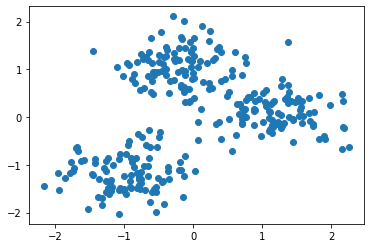

In [28]:
plt.scatter(scaled_f[:,0],scaled_f[:,1])

In [31]:
import numpy as np

In [34]:
import seaborn as sns

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


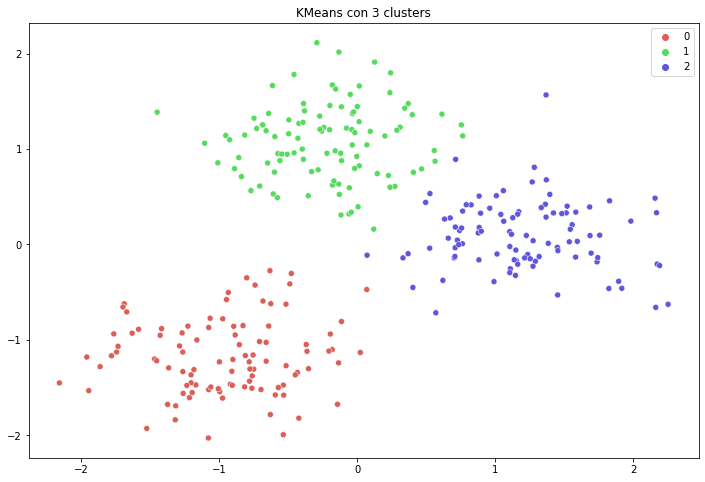

In [35]:
plt.figure(figsize = (12,8))
sns.scatterplot(scaled_f[:,0],scaled_f[:,1], hue = kmeans.labels_, palette = sns.color_palette('hls', 3))
plt.title('KMeans con 3 clusters')
plt.show()


# Hierarchical Clustering (Dendrograma)

La mejora sobre K-Means es fundamentalmente que no hay que asumir el número de clusters.

Hay dos maneras de atacar éste problema:

+ Por aglomeración
+ Por división

**Aglomeración:**

Se empieza asumiendo que cada registro es un cluster individual y se van combinando aquellos similares hasta conseguir un solo cluster, la población entera. Después se decide el número óptimo de clusters según la distancia.



**División:**

El proceso inverso. Se comienza con un solo cluster y se va dividiendo hasta tener el número óptimo de clusters (según distancia).


![](data/hca.png)

##### Medidas de distancia

Aquí también entra la distancia, para medir entre registros/clusters. Normalmente, se usa la distancia euclídea. El uso de la métrica de distancia depende del problema en cuestión, por ejemplo, en una clusterización de lugares en la ciudad, podría ser mejor usar $cityblock$, o incluso tomar el tiempo que hay entre dos lugares (tiempo como métrica de distancia).

##### Criterios de conexión (linkage criteria)

Después de seleccionar la métrica de distancia, hay que decidir de qué manera se conectan los registros al cluster. Puede ser:

+ Single-linkage: conexión entre los puntos más parecidos del cluster.
+ Complete-linkage: conexión entre los puntos menos parecidos del cluster.
+ Average-linkage: conexión entre los centroides del cluster.


![](data/link.png)

Al igual que la métrica de distancia, la elección del criterio de conexión ha de basarse en el propio problema. Por ejemplo, para clasificar varias tecnologías diferentes tendría sentido basarse en cuales son más parecidos. Si no existen justificaciones claras de cual usar, se suele usar el criterio de Ward, que viene a ser mínimos cuadrados de las distancias, respecto de la media del cluster. Esto concuerda con el concepto de distancia entre grupos en estadística (ANOVA, MANOVA....)

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

In [44]:
#Datos sinteticos

np.set_printoptions(precision = 5, suppress = True)

np.random.seed(2453)

a = np.random.multivariate_normal([10,0],[[3,1], [1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1], [1,4]], size = [50,])

In [39]:
b

array([[-0.70301, 21.27917],
       [ 3.0048 , 22.20668],
       [ 3.03531, 17.47778],
       [-3.53217, 21.65185],
       [ 0.21286, 18.61586],
       [ 1.99027, 20.77436],
       [-0.70238, 19.41284],
       [-2.23129, 17.4253 ],
       [ 0.55333, 18.45491],
       [-1.26678, 20.5818 ],
       [ 1.22512, 20.6128 ],
       [-2.95219, 21.92504],
       [ 1.39689, 21.18277],
       [ 1.50512, 19.75955],
       [ 2.86697, 19.52229],
       [-0.14282, 22.3043 ],
       [ 1.34539, 21.43974],
       [ 0.13788, 22.87997],
       [ 1.224  , 20.61399],
       [-2.39162, 15.63534],
       [-0.29405, 21.22844],
       [-0.2063 , 23.10706],
       [-1.53227, 17.66859],
       [-0.68856, 20.69246],
       [-2.54586, 18.61938],
       [ 2.49505, 22.32622],
       [ 0.1621 , 17.91814],
       [ 0.04025, 17.12017],
       [ 4.6714 , 21.66391],
       [-0.35779, 17.63646],
       [-3.50578, 16.78981],
       [ 1.65652, 22.21206],
       [ 1.04404, 19.16585],
       [-0.44878, 20.54243],
       [ 1.428

In [40]:
a

array([[[12.04526,  0.92615]],

       [[10.40834,  0.411  ]],

       [[13.21427,  1.44825]],

       [[ 7.55934, -0.01579]],

       [[11.6267 ,  0.54769]],

       [[ 6.58708,  1.0032 ]],

       [[ 7.16615,  0.27817]],

       [[ 9.51054,  1.20076]],

       [[10.543  , -2.12837]],

       [[10.11321, -1.48664]],

       [[10.14383,  1.57072]],

       [[ 9.89126, -1.94384]],

       [[15.36319,  0.74112]],

       [[ 9.99909, -1.94201]],

       [[11.43793,  3.16749]],

       [[ 9.06005,  0.49417]],

       [[ 7.66521, -2.28621]],

       [[10.69566,  0.74286]],

       [[ 8.36838,  0.17897]],

       [[ 8.89173,  0.14492]],

       [[11.04686,  3.36918]],

       [[10.00128,  0.29929]],

       [[ 9.19337,  1.44786]],

       [[ 7.25368, -0.83982]],

       [[ 8.14345, -1.37055]],

       [[11.57464,  0.70585]],

       [[10.59015, -0.71503]],

       [[11.23048, -1.28942]],

       [[10.355  , -5.23891]],

       [[ 7.8405 , -3.75877]],

       [[15.27844,  4.55998]],

       [

In [45]:
X=np.concatenate((a,b))
X.shape

(150, 2)

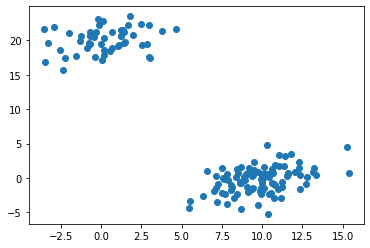

In [46]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [47]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(X)

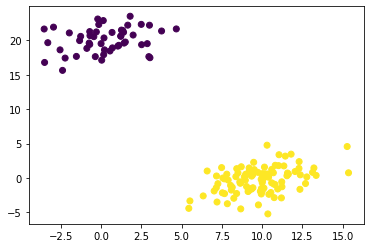

In [48]:
plt.scatter(X[:,0], X[:,1], c=clusters.fit_predict(X))
plt.show();

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [50]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [51]:
z = linkage(X, 'ward')

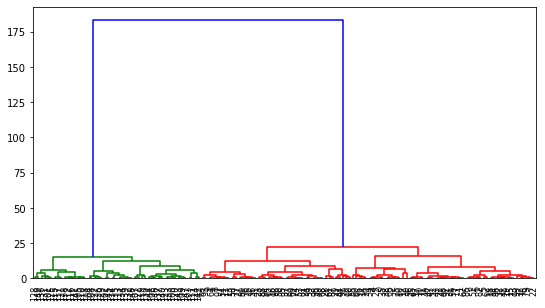

In [52]:
plt.figure(figsize=(9, 5))
dendrogram(z, leaf_rotation=90., leaf_font_size=8.)
plt.show();

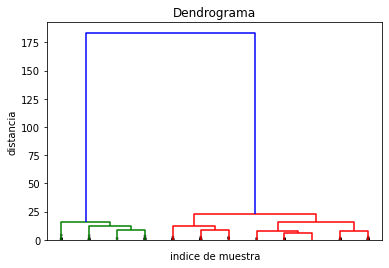

In [55]:
dendrogram(z,truncate_mode='lastp', p = 12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=False)
plt.title('Dendrograma')
plt.xlabel('indice de muestra')
plt.ylabel('distancia')

plt.show();

In [54]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children.  The top of the U-link indicates a
    cluster merge.  The two legs of the U-link indicate which clusters
    were merged.  The length of the two legs of the U-link represents
    the distance between the child clusters.  It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
       

In [56]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    

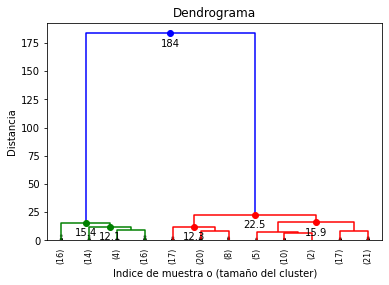

In [57]:
fancy_dendro(z, truncate_mode='lastp', p=12,
                 leaf_rotation=90., leaf_font_size=8.,
                 show_contracted=True, annotate_above=10)

plt.show();

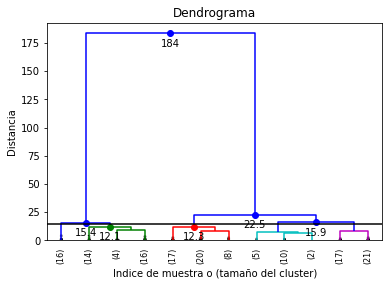

In [59]:
fancy_dendro(z, truncate_mode='lastp', p=12,
                 leaf_rotation=90., leaf_font_size=8.,
                 show_contracted=True, annotate_above=10, max_d =15)

plt.show();

In [60]:
from scipy.cluster.hierarchy import fcluster

In [61]:
max_d = 50
clusters = fcluster(z, max_d, criterion = 'distance')

In [62]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [64]:
max_d = 20
clusters = fcluster(z, max_d, criterion = 'distance')
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [65]:
help(fcluster)

Help on function fcluster in module scipy.cluster.hierarchy:

fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)
    Form flat clusters from the hierarchical clustering defined by
    the given linkage matrix.
    
    Parameters
    ----------
    Z : ndarray
        The hierarchical clustering encoded with the matrix returned
        by the `linkage` function.
    t : scalar
        For criteria 'inconsistent', 'distance' or 'monocrit',
         this is the threshold to apply when forming flat clusters.
        For 'maxclust' or 'maxclust_monocrit' criteria,
         this would be max number of clusters requested.
    criterion : str, optional
        The criterion to use in forming flat clusters. This can
        be any of the following values:
    
          ``inconsistent`` :
              If a cluster node and all its
              descendants have an inconsistent value less than or equal
              to `t` then all its leaf descendants belong to the
     

In [66]:
from sklearn.datasets import make_moons

# Kmeans vs Hierarchical

In [72]:
moons = make_moons(n_samples= 100, shuffle= True, noise = 0.04)[0]

In [69]:
moons = make_moons(n_samples= 100, shuffle= True, noise = 0.04)

In [68]:
moons

array([[ 0.5289 , -0.44438],
       [ 0.94681,  0.07976],
       [-0.00418,  0.36267],
       [-0.63845,  0.81129],
       [ 0.31587,  0.99011],
       [ 0.13586,  1.02781],
       [-0.88743,  0.48745],
       [ 0.36913,  0.89511],
       [ 1.66886, -0.21577],
       [ 0.45845,  0.82859],
       [ 0.94645,  0.37613],
       [ 0.05525,  0.26611],
       [-0.62427,  0.78572],
       [-1.09105,  0.02616],
       [-0.29075,  0.97005],
       [ 0.07046, -0.04527],
       [ 1.79968,  0.04582],
       [ 1.17314, -0.55329],
       [ 0.11571,  0.05339],
       [ 1.40844, -0.36046],
       [ 0.36019, -0.37701],
       [ 0.59923,  0.69068],
       [-0.27231,  0.97181],
       [ 1.92978, -0.01871],
       [-0.42835,  0.85872],
       [ 1.96904,  0.4445 ],
       [ 1.55023, -0.32482],
       [ 1.60082, -0.18429],
       [ 0.5291 , -0.42319],
       [-0.52754,  0.9058 ],
       [ 1.9667 ,  0.33923],
       [ 1.00215, -0.51896],
       [ 0.9165 , -0.5056 ],
       [ 0.09001,  0.43004],
       [-0.722

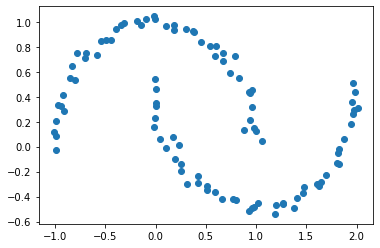

In [73]:
plt.scatter(moons[:,0], moons[:,1]);

In [74]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

In [75]:
cluster  = KMeans(n_clusters = 2).fit(moons)

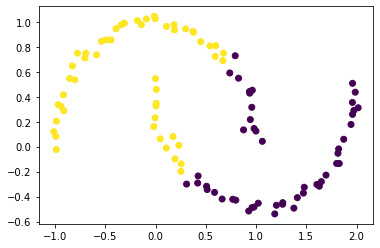

In [76]:
plt.scatter(moons[:,0], moons[:,1], c = cluster.labels_);

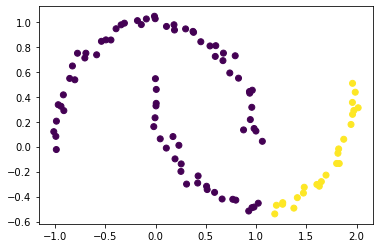

In [77]:
cluster = AC().fit(moons)#por defecto para jerarquico toma de metodo el de ward
#The distance between clusters is the sum of squared differences within all clusters

plt.scatter(moons[:,0], moons[:,1], c = cluster.labels_);

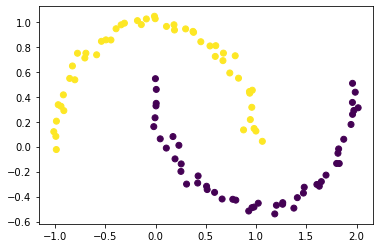

In [78]:
cluster=AC(linkage='single').fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

In [79]:
import umap

In [81]:
from sklearn.datasets import load_digits

In [82]:
digits = load_digits()

In [84]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

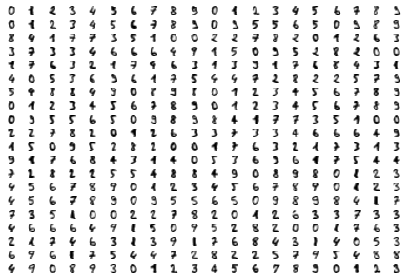

In [85]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [91]:
len(digits.data[0])

64

In [92]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [93]:
digits.target[0]

0

In [86]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [87]:
embedding = reducer.transform(digits.data)

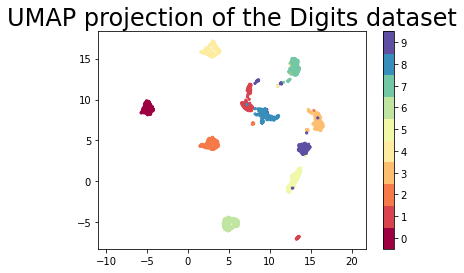

In [88]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);